***1. Test de Neyman-Pearson : cas d'un adversaire passif***

**1.1. Deux hypothèses simples**

* 1.1.1.

1)A) On obtient la statistique suivante :

$
   \sum_{k=0}^{255} P_{y_{Blanc}}^n (k) * log(\frac{Q_{Blanc}(k)}{P_{Blanc}(k)})+ \sum_{k=0}^{255}  P_{y_{Noir}}^n(k) * log(\frac{Q_{Noir}(k)}{P_{Noir}(k)})
$

1)B)Le critère de Neyman Pearson s'énonce comme suit :
Si la caractéristique décrite précédemment est inférieur à un seuil fixée pour un objet mathématique donné, alors $H_0$ est acceptée, sinon on accepte $H_1$

2)A)
$\alpha$ est la probabilité de première espèce : refuser $H_0$ alors qu'elle est vraie.
$\alpha = P(H_1 | H_0)$

$\beta$ est la probabilité de seconde espèce : accepter $H_1$ alors qu'elle est fausse.
$\beta = P(H_0 | H_1)$

In [2]:
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import glob
import pathlib
from pathlib import Path
import math
from tqdm import tqdm

In [3]:
original=io.imread(r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\BarcodesA\OriginalCode.pgm')
plt.imshow(original,cmap='gray')

dimCode = len(original)**2

#Création des deux sous suites yblanc et ynoir

y_noirs=np.array([[i,j]for i in range(len(original)) for j in range(len(original[0])) if original[i][j]==0])
y_blancs=np.array([[i,j]for i in range(len(original)) for j in range(len(original[0])) if original[i][j]==255])

print('Nombre de pixels noirs : ',len(y_noirs))
print('Nombre de pixels blancs : ',len(y_blancs))

#Les deux sous suites contiennent effectivement chacune 28*28*2/2 éléments. Il y  a autant de pixels noirs que de pixels blancs



FileNotFoundError: No such file: 'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\BarcodesA\OriginalCode.pgm'

In [3]:
dir_nameA=r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\BarcodesA//'
dir_nameF=r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\BarcodesF//'

In [4]:
#Constantes pour H0
u00=50
u0255=230
sigma2=120


#Constantes pour hypothèse H1
u10=48
u1255=228
sigma2=120

In [5]:
def f(xi,const):
    return (1/(2*np.pi*sigma2**(1/2)))*math.exp((-1/(2*sigma2))*(xi-const)**2)

def Z(const):
    somme=0
    for i in range(255):
        somme+=f(i,const)
    return somme**(1/2)

Z_noir=Z(u00)
Z_blanc=Z(u0255)

Z_noir_prime=Z(u10)
Z_blanc_prime=Z(u1255)

def P_noir(k,u00):
    return (1/Z_noir)*f(k,u00)

def P_blanc(k,u0255):
    return (1/Z_blanc)*f(k,u0255)

def Q_noir(k,u10):
    return (1/Z_noir_prime)*f(k,u10)

def Q_blanc(k,u1255):
    return (1/Z_blanc_prime)*f(k,u1255)


In [6]:
def Pn(ycolor,dir_name):
    p = Path(dir_name)
    stat = []
    c = 0
    for fname in tqdm(p.glob("*.*")):
        stat.append([0]*256)
        I = io.imread(fname)
        for z in ycolor:
            stat[c][I[z[0]][z[1]]]+=1
        c+=1
    return stat

PnyBlancsA = Pn(y_blancs,dir_nameA)
PnyNoirsA = Pn(y_noirs,dir_nameA)
PnyBlancsF = Pn(y_blancs,dir_nameF)
PnyNoirsF = Pn(y_noirs,dir_nameF)


10001it [00:12, 831.63it/s]
10001it [00:11, 864.95it/s]
10001it [00:11, 835.99it/s]
10001it [00:11, 870.83it/s]


In [14]:
def statistiques(dir_name,PnyNoirs,PnyBlancs,dimCode):
    T = []
    p = Path(dir_name)

    c=0
    for fname in tqdm(p.glob("*.*")):
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir(k,u10)/P_noir(k,u00))*(PnyNoirs[c][k])
            valB+= math.log(Q_blanc(k,u1255)/P_blanc(k,u0255))*(PnyBlancs[c][k])
        T.append(2*(valN+valB)/dimCode)
        c+=1

    return T

TA = statistiques(dir_nameA,PnyNoirsA,PnyBlancsA,dimCode)[:-1]
TF = statistiques(dir_nameF,PnyNoirsF,PnyBlancsF,dimCode)[:-1]

10001it [00:23, 431.76it/s]
10001it [00:23, 431.87it/s]


2)c) Pour compter les fausses alarmes, il faut vérifier $T_A$ > seuil.

2)d) Pour compter la non détection, il faut vérifier $T_F$ < seuil.

(array([  11.,  103.,  631., 1723., 2904., 2714., 1412.,  419.,   73.,
          10.]),
 array([-0.08375208, -0.07374783, -0.06374358, -0.05373932, -0.04373507,
        -0.03373082, -0.02372657, -0.01372232, -0.00371807,  0.00628619,
         0.01629044]),
 <BarContainer object of 10 artists>)

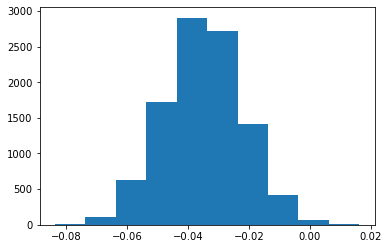

In [15]:
plt.hist(TA)

(array([  37.,  248.,  901., 2041., 2919., 2327., 1157.,  309.,   57.,
           4.]),
 array([-0.01338643, -0.00369256,  0.00600132,  0.0156952 ,  0.02538908,
         0.03508295,  0.04477683,  0.05447071,  0.06416459,  0.07385846,
         0.08355234]),
 <BarContainer object of 10 artists>)

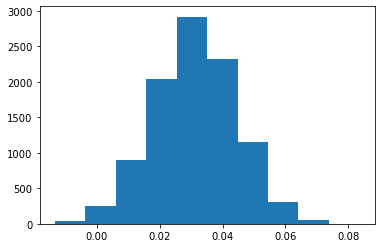

In [16]:
plt.hist(TF)

['alpha =     0.0275', 'beta =     0.0003', 'seuil = -0.01']
['alpha =     0.0237', 'beta =     0.0008', 'seuil = -0.009']
['alpha =     0.0197', 'beta =     0.0012', 'seuil = -0.008']
['alpha =     0.0156', 'beta =     0.0015', 'seuil = -0.007']
['alpha =     0.0129', 'beta =     0.0018', 'seuil = -0.006']
['alpha =     0.0102', 'beta =     0.0023', 'seuil = -0.005']
['alpha =     0.0085', 'beta =     0.0034', 'seuil = -0.004']
['alpha =     0.0075', 'beta =     0.0050', 'seuil = -0.003']
['alpha =     0.0061', 'beta =     0.0065', 'seuil = -0.002']
['alpha =     0.0050', 'beta =     0.0075', 'seuil = -0.001']
['alpha =     0.0037', 'beta =     0.0091', 'seuil = 0.0']
['alpha =     0.0034', 'beta =     0.0116', 'seuil = 0.001']
['alpha =     0.0031', 'beta =     0.0142', 'seuil = 0.002']
['alpha =     0.0026', 'beta =     0.0171', 'seuil = 0.003']
['alpha =     0.0018', 'beta =     0.0196', 'seuil = 0.004']
['alpha =     0.0016', 'beta =     0.0236', 'seuil = 0.005']
['alpha =     0.0

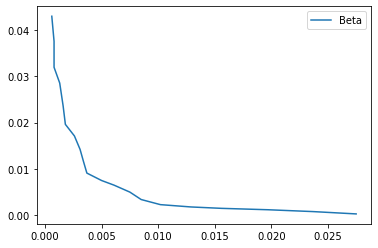

In [17]:
alphas =[]
betas= []
for i in range(-10,10):
    seuil = i/1000
    alpha = np.count_nonzero(np.array(TA)>seuil)/len(TA) #on compte le nombre d'Authentiques dont la stat est > seuil
    beta = np.count_nonzero(np.array(TF)<seuil)/len(TF) #on compte le nombre de Falsifiés dont la stat est < seuil
    print(['alpha = '+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas.append(alpha)
    betas.append(beta)

plt.plot(alphas, betas,label='Beta')
plt.legend()

**1.1.2 Test des codes**

In [18]:
dir_nameTpass = r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\Testcodes_pas//'

originalT = io.imread(r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\Testcodes_pas//OriginalCode.pgm')

y_noirsT=np.array([[i,j]for i in range(len(originalT)) for j in range(len(originalT[0])) if originalT[i][j]==0])
y_blancsT=np.array([[i,j]for i in range(len(originalT)) for j in range(len(originalT[0])) if originalT[i][j]==255])

PnyBlancsTest = Pn(y_blancsT,dir_nameTpass)
PnyNoirsTest = Pn(y_noirsT,dir_nameTpass)


11it [00:00, 725.82it/s]
11it [00:00, 732.32it/s]


On choisit un seuil de -0.005 pour obtenir $\alpha = 10^{-2}$.

In [19]:
TTestP = statistiques(dir_nameTpass,PnyNoirsTest,PnyBlancsTest,len(originalT)**2)[:-1]
TTestP

11it [00:00, 417.76it/s]


[-0.016745276969942373,
 0.026537035955227682,
 -0.04416874635769748,
 0.01624792030896914,
 0.04571220602325496,
 0.02334826044502361,
 -0.005350719146813144,
 -0.04289323615361584,
 -0.021762283772663444,
 0.03805914479876508]

En fixant le seuil de décision à -0.005 on obtient que les code-barres : 1,3,7,8 et 9 sont authentiques et les autres frauduleux.

**1.2 Une hypothèse simple ($H_0$) et une hypothèse composée ($H_1$)**

3)On a toujours la statistique suivante :

$
   \sum_{k=0}^{255} P_{y_{Blanc}}^n (k) * log(\frac{Q_{Blanc}(k)}{P_{Blanc}(k)})+ \sum_{k=0}^{255}  P_{y_{Noir}}^n(k) * log(\frac{Q_{Noir}(k)}{P_{Noir}(k)})
$

In [1]:
def statistiques2(dir_name,PnyNoirs,PnyBlancs,dimCode,yblancs,ynoirs):
    T = []
    p = Path(dir_name)

    c=0
    for fname in tqdm(p.glob("*.*")):

        
        #Calcul de U10 et U1255
        
        I = io.imread(fname)
        u10 = 0
        u1255 = 0
        
        for z in yblancs:
                u1255+=I[z[0]][z[1]]
                
        for z in ynoirs:
                u10+=I[z[0]][z[1]]
                
        u10 = min(u10/len(ynoirs),u00-1)
        u1255 = min(u1255/len(yblancs),u0255-1)
        
        #Calcul de la statistique
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir(k,u10)/P_noir(k,u00))*(PnyNoirs[c][k])
            valB+= math.log(Q_blanc(k,u1255)/P_blanc(k,u0255))*(PnyBlancs[c][k])
        T.append(2*(valN+valB)/dimCode)
        c+=1

    return T

TA2 = statistiques2(dir_nameA,PnyNoirsA,PnyBlancsA,dimCode,y_blancs,y_noirs)[:-1]
TF2 = statistiques2(dir_nameF,PnyNoirsF,PnyBlancsF,dimCode,y_blancs,y_noirs)[:-1]

NameError: name 'dir_nameA' is not defined

(array([  14.,  169.,  973., 2489., 3342., 2132.,  721.,  135.,   21.,
           4.]),
 array([-0.03477249, -0.02923099, -0.0236895 , -0.018148  , -0.01260651,
        -0.00706501, -0.00152352,  0.00401798,  0.00955947,  0.01510097,
         0.02064247]),
 <BarContainer object of 10 artists>)

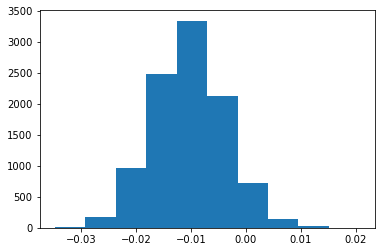

In [21]:
plt.hist(TA2)

(array([2.600e+02, 1.665e+03, 3.090e+03, 2.733e+03, 1.477e+03, 5.880e+02,
        1.380e+02, 4.300e+01, 4.000e+00, 2.000e+00]),
 array([0.0004301 , 0.01117762, 0.02192514, 0.03267266, 0.04342018,
        0.05416769, 0.06491521, 0.07566273, 0.08641025, 0.09715777,
        0.10790529]),
 <BarContainer object of 10 artists>)

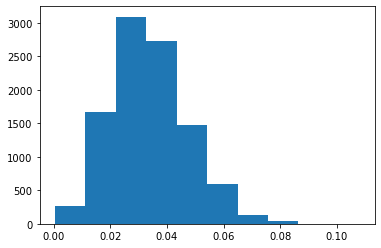

In [22]:
plt.hist(TF2)

In [4]:
alphas2 =[]
betas2= []
for i in range(0,15):
    seuil = i/1000
    alpha = np.count_nonzero(np.array(TA2)>seuil)/len(TA2)
    beta = np.count_nonzero(np.array(TF2)<seuil)/len(TF2)
    print(['alpha = '+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas2.append(alpha)
    betas2.append(beta)

plt.plot(alphas2, betas2,label='Beta')
plt.legend()

NameError: name 'TA2' is not defined

*4) Test sur les codes d'essai*

In [24]:
TTestP = statistiques2(dir_nameTpass,PnyNoirsTest,PnyBlancsTest,len(originalT)**2,y_blancsT,y_noirsT)[:-1]
TTestP

11it [00:00, 209.59it/s]


[-0.0012690864937518534,
 0.027209607279675824,
 -0.014980821187629416,
 0.018544760601208563,
 0.04736844409246212,
 0.025240511286686758,
 0.005501990878523577,
 -0.014343066085588597,
 -0.0037775898951123927,
 0.04250295835735179]

On a fixé le seuil à 0.005 pour $\alpha = 10^{-2}$. On en déduit que les codes 1,3,,8 et 9 sont authentiques et les autres sont frauduleux.

**2. Cas de l'adversaire actif**

**2.1 Deux hypothèses simples**

In [5]:
#constantes de la partie 2
u00_part2=54
u0255_part2=100
sigma2=102
dimCode2 = 900

Z_noir_part2=Z(u00_part2)
Z_blanc_part2=Z(u0255_part2)


kappa=int((u00_part2+u0255_part2)/2) #seuil de décision



def P_bw(const):
    somme=0
    for i in range(kappa,256):
        somme+=f(i,const)
    return somme**(1/2)

def P_wb(const):
    somme=0
    for i in range(0,kappa):
        somme+=f(i,const)
    return somme**(1/2)

P_bw_part2=P_bw(u00_part2)
P_wb_part2=P_wb(u0255_part2)


def P_noir_part2(k):
    return (1/Z_noir_part2)*f(k,u00_part2)

def P_blanc_part2(k):
    return (1/Z_blanc_part2)*f(k,u0255_part2)

def Q_noir_part2(k):
    return (1-P_bw_part2)*P_noir_part2(k) + P_bw_part2*P_blanc_part2(k)

def Q_blanc_part2(k):
    return (1-P_wb_part2)*P_blanc_part2(k) + P_wb_part2*P_noir_part2(k)



def statistiques_part2(dir_name,PnyNoirs,PnyBlancs,dimCode):
    T = []
    p = Path(dir_name)

    c=0
    for fname in tqdm(p.glob("*.*")):
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir_part2(k)/P_noir_part2(k),10)*(PnyNoirs[c][k])
            valB+= math.log(Q_blanc_part2(k)/P_blanc_part2(k),10)*(PnyBlancs[c][k])
        T.append(2*(valN+valB)/dimCode)
        c+=1

    return T

NameError: name 'Z' is not defined

In [26]:
#2.1.2

MGBarcodesA=r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\MGBarcodesA//'
MGBarcodesF=r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\MGBarcodesF//'

originalMG = io.imread(r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\MGBarcodesA//OriginalCode.pgm')

y_blancsMG = np.array([[i,j]for i in range(len(originalMG)) for j in range(len(originalMG[0])) if originalMG[i][j]==255])
y_noirsMG = np.array([[i,j]for i in range(len(originalMG)) for j in range(len(originalMG[0])) if originalMG[i][j]==0])

PnyBlancsA_part2 = Pn(y_blancsMG,MGBarcodesA)
PnyNoirsA_part2 = Pn(y_noirsMG,MGBarcodesA)
PnyBlancsF_part2 = Pn(y_blancsMG,MGBarcodesF)
PnyNoirsF_part2 = Pn(y_noirsMG,MGBarcodesF)

TA_part2 = statistiques_part2(MGBarcodesA,PnyNoirsA_part2,PnyBlancsA_part2,dimCode2)[:-1]
TF_part2 = statistiques_part2(MGBarcodesF,PnyNoirsF_part2,PnyBlancsF_part2,dimCode2)[:-1]

10001it [00:13, 748.88it/s]
10001it [00:12, 818.15it/s]
10001it [00:13, 748.15it/s]
10001it [00:12, 810.48it/s]
10001it [00:34, 292.32it/s]
10001it [00:34, 293.06it/s]


['alpha =     0.0538', 'beta =     0.0002', 'seuil = -0.05']
['alpha =     0.0487', 'beta =     0.0002', 'seuil = -0.0498']
['alpha =     0.0452', 'beta =     0.0003', 'seuil = -0.0496']
['alpha =     0.0404', 'beta =     0.0003', 'seuil = -0.0494']
['alpha =     0.0371', 'beta =     0.0003', 'seuil = -0.0492']
['alpha =     0.0330', 'beta =     0.0003', 'seuil = -0.049']
['alpha =     0.0297', 'beta =     0.0003', 'seuil = -0.0488']
['alpha =     0.0270', 'beta =     0.0003', 'seuil = -0.0486']
['alpha =     0.0248', 'beta =     0.0003', 'seuil = -0.0484']
['alpha =     0.0222', 'beta =     0.0003', 'seuil = -0.0482']
['alpha =     0.0197', 'beta =     0.0004', 'seuil = -0.048']
['alpha =     0.0179', 'beta =     0.0004', 'seuil = -0.0478']
['alpha =     0.0163', 'beta =     0.0004', 'seuil = -0.0476']
['alpha =     0.0146', 'beta =     0.0004', 'seuil = -0.0474']
['alpha =     0.0129', 'beta =     0.0004', 'seuil = -0.0472']
['alpha =     0.0118', 'beta =     0.0004', 'seuil = -0.047

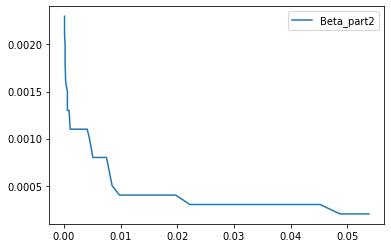

In [33]:
alphas_part2 =[]
betas_part2= []
for i in range(-500,-400,2):
    seuil = i/10000
    alpha = np.count_nonzero(np.array(TA_part2)>seuil)/len(TA_part2)
    beta = np.count_nonzero(np.array(TF_part2)<seuil)/len(TF_part2)
    print(['alpha = '+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas_part2.append(alpha)
    betas_part2.append(beta)

plt.plot(alphas_part2, betas_part2,label='Beta_part2')
plt.legend()

(array([  88.,  801., 2041., 2766., 2313., 1257.,  511.,  154.,   56.,
          13.]),
 array([-0.05192557, -0.03248239, -0.01303921,  0.00640397,  0.02584715,
         0.04529034,  0.06473352,  0.0841767 ,  0.10361988,  0.12306306,
         0.14250624]),
 <BarContainer object of 10 artists>)

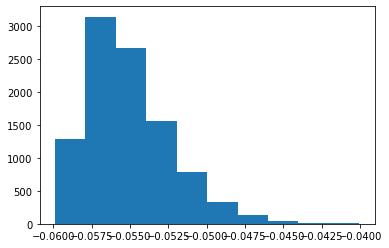

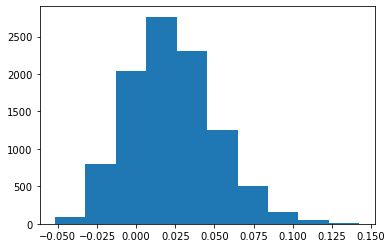

In [34]:
plt.hist(TA_part2)
plt.figure()
plt.hist(TF_part2)



**Test sur les images d'essai**

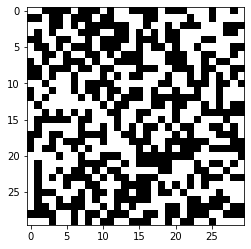

In [35]:
dir_nameTact = r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\Testcodes_act//'
originalTact = io.imread(r'C:\Users\y4nni\OneDrive\Documents\SAFE\sawaya\TP2\Testcodes_act//OriginalCode.pgm')
plt.imshow(originalTact,cmap='gray')

In [36]:
y_blancsTa = np.array([[i,j]for i in range(len(originalTact)) for j in range(len(originalTact[0])) if originalTact[i][j]==255])
y_noirsTa = np.array([[i,j]for i in range(len(originalTact)) for j in range(len(originalTact[0])) if originalTact[i][j]==0])

PnyBlancsTa = Pn(y_blancsTa,dir_nameTact)
PnyNoirsTa = Pn(y_noirsTa,dir_nameTact)

TTact = statistiques_part2(dir_nameTact,PnyNoirsTa,PnyBlancsTa,dimCode2)[:-1]

11it [00:00, 716.28it/s]
11it [00:00, 2174.85it/s]
11it [00:00, 213.22it/s]


In [37]:
TTact

[-0.01650042571524297,
 0.02623555679763422,
 0.08383609913983205,
 -0.057985179496402695,
 0.0020619762729064063,
 -0.05496656841441592,
 -0.056574344991907624,
 0.045832441286820874,
 -0.05704843313964979,
 -0.0544512653888857]

On choisit un seuil de -0.0466 pour avoir $\alpha = 10^{-2}$.

On obtient que les codes barres 4,6,7,9 et 10 sont authentiques et les autres frauduleux.